<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/%E3%80%8Ckeras_03NEU_checkpoint_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd

In [8]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
glob("/content/drive/My Drive/*") # list google drive files

['/content/drive/My Drive/賴紀廷.musx',
 '/content/drive/My Drive/安裝',
 '/content/drive/My Drive/醫材',
 '/content/drive/My Drive/生醫訊號PPT',
 '/content/drive/My Drive/電吉他音色',
 '/content/drive/My Drive/第3方VST',
 '/content/drive/My Drive/Dino_runGame',
 '/content/drive/My Drive/cubase入門',
 '/content/drive/My Drive/2020北訓android技術',
 '/content/drive/My Drive/刷提',
 '/content/drive/My Drive/高普考',
 '/content/drive/My Drive/Piture',
 '/content/drive/My Drive/程式',
 '/content/drive/My Drive/ClearScannerData',
 '/content/drive/My Drive/計劃書資料',
 '/content/drive/My Drive/新增資料夾',
 '/content/drive/My Drive/破解',
 '/content/drive/My Drive/各種實驗參考資料',
 '/content/drive/My Drive/商業計劃書',
 '/content/drive/My Drive/rar',
 '/content/drive/My Drive/未命名資料夾',
 '/content/drive/My Drive/ee',
 '/content/drive/My Drive/Cloud Drive',
 '/content/drive/My Drive/CV',
 '/content/drive/My Drive/多媒體',
 '/content/drive/My Drive/希波克',
 '/content/drive/My Drive/java interview',
 '/content/drive/My Drive/Pyhton',
 '/content/drive/My

In [10]:
paths = glob("/content/drive/My Drive/Day2/NEU_defect/*.bmp") # get all image paths
paths = glob("NEU_defect/*.bmp") # get all image paths
cls = [path.split('/')[-1].split('_')[0] for path in paths] # get all images' class label
print(cls)

[]


In [11]:
classes, counts = np.unique(cls, return_counts=True) # classes distribution
print(classes, counts)

[] []


<BarContainer object of 0 artists>

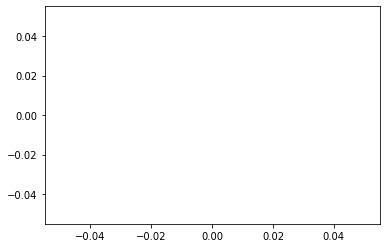

In [12]:
plt.bar(classes, height=counts)

In [14]:
img = cv2.imread(paths[0])
plt.imshow(img)
plt.show()
img = cv2.resize(img, (100,100))
label = cls[0]
print(label, img.shape)
plt.imshow(img)
plt.show()

IndexError: ignored

In [15]:
label_map = {
    'PS':0,
    'Sc':1,
    'RS':2,
    'In':3,
    'Cr':4,
    'Pa':5
}
X = np.zeros((1800, 100, 100, 3))
y = np.zeros((1800, 1))
for i, path in enumerate(tqdm(paths)):
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (100,100))
    img = img/255
    label = cls[i]
    X[i] = img
    y[i] = label_map[label]

In [1]:
import pickle
# load variable from pickle file
with open('X.pickle', 'rb') as file:
    X = pickle.load(file)
with open('y.pickle', 'rb') as file:
    y = pickle.load(file)
X.shape, y.shape

FileNotFoundError: ignored

In [3]:
y = to_categorical(y)
X.shape, y.shape

NameError: ignored

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: ignored

In [6]:
img_size = 100
num_classes = 6

In [8]:
# 1
inputs = Input(shape=(img_size, img_size, 3))
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(16, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

NameError: ignored

In [9]:
# 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation=keras.activations.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

NameError: ignored

In [10]:
model.summary()

NameError: ignored

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

NameError: ignored

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=1,
                    verbose=1,
                    validation_data=(X_test, y_test))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')
score

In [12]:
logs = history.history
logs

NameError: ignored

In [13]:
prediction = model.predict(X_test[:1])
print(prediction)
print(np.argmax(prediction))


NameError: ignored

In [ ]:
plt.plot(logs['acc'])
plt.plot(logs['val_acc'])
plt.title('acc')

In [14]:
plt.plot(logs['loss'])
plt.plot(logs['val_loss'])
plt.title('loss')

NameError: ignored

In [ ]:
# confusion matrix
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
preds.shape

In [15]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis=-1)
confusion_matrix(y_true, preds)
# row: y_true, col: y_pred

NameError: ignored

In [16]:
prediction = model.predict(X_test[:1])
print(prediction)

model.save('/content/drive/My Drive/Day2/NEU_defect/my_model.h5')
del model
model = load_model('/content/drive/My Drive/Day2/NEU_defect/my_model.h5')
prediction = model.predict(X_test[:1])
print(prediction)

NameError: ignored

In [17]:
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

NameError: ignored